<h2>Momentum</h2>
Momentum values peak when the stock price changes by a large amount as
compared to the price 'n' days ago.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

In [4]:
time_period = 20 
history = [] # history of observed prices to use in momentum calculation
mom_values = [] # track momentum values for visualization purposes
close = goog_data['Adj Close']

for close_price in close:
    history.append(close_price)
    if len(history) > time_period: 
        del (history[0])
    
    mom = close_price - history[0]
    mom_values.append(mom)


In [5]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data =goog_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']

<AxesSubplot:xlabel='Date', ylabel='Momentum in $'>

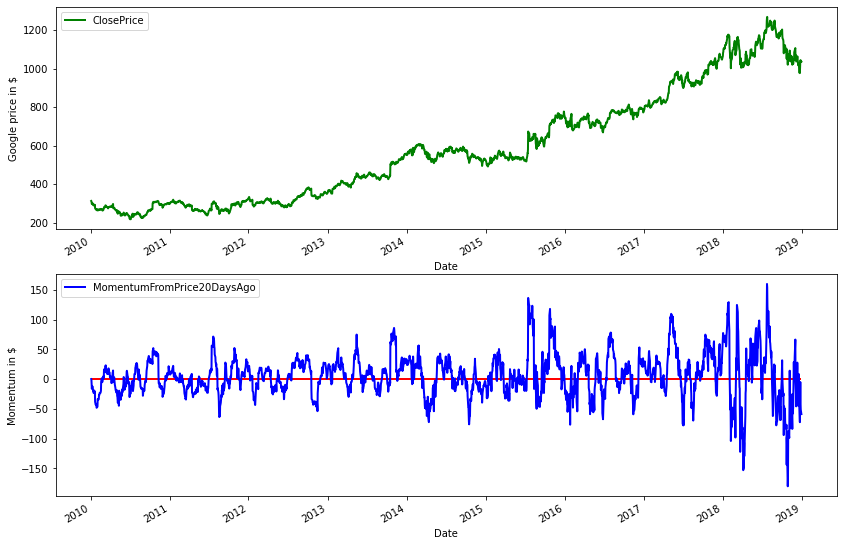

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
ax2.hlines(0, goog_data.index.values[0], goog_data.index.values[-1], lw=2, color='r')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
